Install demes, tspop, msprime and the latest version of stdpopsim

In [1]:
import sys

In [2]:
# !{sys.executable} -m pip install demesdraw
import demes, demesdraw

In [3]:
# !{sys.executable} -m pip install tspop
import tspop

In [4]:
# !{sys.executable} -m pip install git+https://github.com/popsim-consortium/stdpopsim
import stdpopsim

In [5]:
# !{sys.executable} -m pip install numpy==1.21.0

In [11]:
import msprime
import matplotlib.pyplot as plt

### 1. Import the OOA_archaic model from stdpopsim, convert to demes

In [7]:
species = stdpopsim.get_species("HomSap")
contig = species.get_contig("chr22") # default is a flat genetic map
model = species.get_demographic_model('OutOfAfricaArchaicAdmixture_5R19')

In [8]:
graph = model.model.to_demes()

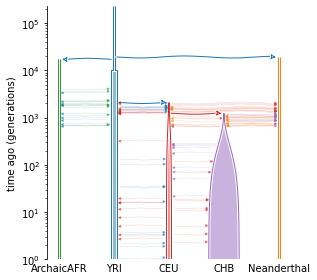

In [12]:
_, ax = plt.subplots(1, 1, figsize=(4.5, 4), tight_layout=True)
ax = demesdraw.tubes(graph, ax=ax, log_time=True)

### 2. Convert to msprime format and add a census time

In [22]:
msp_dem = msprime.Demography.from_demes(graph)

In [23]:
msp_dem.add_census(time=2094)
msp_dem.sort_events()
msp_dem

Demography(populations=[Population(initial_size=13900, growth_rate=0, name='YRI', description='1000 Genomes YRI (Yoruba)', extra_metadata={}, default_sampling_time=0.0, initially_active=True, id=0), Population(initial_size=3600, growth_rate=0, name='Neanderthal', description='Putative Neanderthals', extra_metadata={}, default_sampling_time=0.0, initially_active=True, id=1), Population(initial_size=3600, growth_rate=0, name='ArchaicAFR', description='Putative Archaic Africans', extra_metadata={}, default_sampling_time=0.0, initially_active=True, id=2), Population(initial_size=10855.080951853866, growth_rate=0.00125, name='CEU', description='1000 Genomes CEU (Utah Residents (CEPH) with Northern and Western European Ancestry', extra_metadata={}, default_sampling_time=0.0, initially_active=True, id=3), Population(initial_size=65834.77001122756, growth_rate=0.00372, name='CHB', description='1000 Genomes CHB (Han Chinese in Beijing, China)', extra_metadata={}, default_sampling_time=0.0, initially_active=True, id=4)], events=[MigrationRateChange(time=644.8275862068965, rate=1.98e-05, source='ArchaicAFR', dest='YRI'), MigrationRateChange(time=644.8275862068965, rate=1.98e-05, source='YRI', dest='ArchaicAFR'), MigrationRateChange(time=644.8275862068965, rate=8.25e-06, source='Neanderthal', dest='CEU'), MigrationRateChange(time=644.8275862068965, rate=8.25e-06, source='CEU', dest='Neanderthal'), MigrationRateChange(time=644.8275862068965, rate=8.25e-06, source='Neanderthal', dest='CHB'), MigrationRateChange(time=644.8275862068965, rate=8.25e-06, source='CHB', dest='Neanderthal'), PopulationParametersChange(time=1241.3793103448277, initial_size=880, growth_rate=0, population='CEU'), PopulationSplit(time=1241.3793103448277, derived=['CHB'], ancestral='CEU'), MigrationRateChange(time=1241.3793103448277, rate=0, source='CEU', dest='YRI'), MigrationRateChange(time=1241.3793103448277, rate=0, source='YRI', dest='CEU'), MigrationRateChange(time=1241.3793103448277, rate=0, source='CHB', dest='CEU'), MigrationRateChange(time=1241.3793103448277, rate=0, source='CEU', dest='CHB'), MigrationRateChange(time=1241.3793103448277, rate=0, source='Neanderthal', dest='CHB'), MigrationRateChange(time=1241.3793103448277, rate=0, source='CHB', dest='Neanderthal'), MigrationRateChange(time=1241.3793103448277, rate=0.000522, source='CEU', dest='YRI'), MigrationRateChange(time=1241.3793103448277, rate=0.000522, source='YRI', dest='CEU'), PopulationSplit(time=2093.103448275862, derived=['CEU'], ancestral='YRI'), MigrationRateChange(time=2093.103448275862, rate=0, source='CEU', dest='YRI'), MigrationRateChange(time=2093.103448275862, rate=0, source='YRI', dest='CEU'), MigrationRateChange(time=2093.103448275862, rate=0, source='Neanderthal', dest='CEU'), MigrationRateChange(time=2093.103448275862, rate=0, source='CEU', dest='Neanderthal'), CensusEvent(time=2094), MigrationRateChange(time=4310.3448275862065, rate=0, source='ArchaicAFR', dest='YRI'), MigrationRateChange(time=4310.3448275862065, rate=0, source='YRI', dest='ArchaicAFR'), PopulationParametersChange(time=10344.827586206897, initial_size=3600, growth_rate=None, population='YRI'), PopulationSplit(time=17206.896551724138, derived=['ArchaicAFR'], ancestral='YRI'), PopulationSplit(time=19275.862068965518, derived=['Neanderthal'], ancestral='YRI')], migration_matrix=array([[0.00e+00, 0.00e+00, 0.00e+00, 2.48e-05, 0.00e+00],
       [0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00],
       [0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00],
       [2.48e-05, 0.00e+00, 0.00e+00, 0.00e+00, 1.13e-04],
       [0.00e+00, 0.00e+00, 0.00e+00, 1.13e-04, 0.00e+00]]))

### 3. Simulate.

In [24]:
ts = msprime.sim_ancestry(
    samples={"YRI": 10, "CEU": 10, "CHB" : 10},
    demography=msp_dem,
    random_seed=1013,
    sequence_length=249250621,
    recombination_rate=1.14856e-08
)

In [28]:
for t in ts.trees():
    if t.time(t.root) < 2094:
        print("Recent coalescences")

### 4. Use tspop

In [52]:
pa = tspop.get_pop_ancestry(ts, census_time=2094)

In [32]:
print(pa)


PopAncestry summary
Number of ancestral populations: 	3
Number of sample chromosomes: 		60
Number of ancestors: 			122431
Total length of genomes: 		14955037260.000000
Ancestral coverage: 			14955037260.000000


In [37]:
st = pa.squashed_table

In [38]:
set(st['population'])

{0, 1, 2}

In [39]:
st

,sample,left,right,population
0,0,0.0,1725210.0,0
1,0,1725210.0,1828497.0,2
2,0,1828497.0,2197361.0,0
3,0,2197361.0,2201373.0,2
4,0,2201373.0,5926093.0,0
...,...,...,...,...
8276,59,238833872.0,238895087.0,0
8277,59,238895087.0,238996126.0,2
8278,59,238996126.0,243848454.0,0
8279,59,243848454.0,243850032.0,2


In [46]:
# Nea ancestry
st1 = st[st.population == 1]
pop1_lengths = sum(st1.right - st1.left)
print(pop1_lengths/pa.total_genome_length)

0.0103913105195433


In [45]:
# YRI ancestry
st0 = st[st.population == 0]
pop0_lengths = sum(st0.right - st0.left)
print(pop0_lengths/pa.total_genome_length)

0.9797931563963218


In [47]:
# Arch ancestry
st2 = st[st.population == 2]
pop2_lengths = sum(st2.right - st2.left)
print(pop2_lengths/pa.total_genome_length)

0.00981553308413489


So actually, across all of the samples, mix of archaic ancestry. What about just in the CEU samples?

In [60]:
ts_ceu = ts.simplify(ts.samples(3), keep_input_roots=True, filter_populations=False, keep_unary=True)

In [61]:
pa = tspop.get_pop_ancestry(ts_ceu, census_time=2094)

In [62]:
st = pa.squashed_table
set(st['population'])

{0, 1, 2}

In [63]:
# YRI ancestry
st0 = st[st.population == 0]
pop0_lengths = sum(st0.right - st0.left)
print(pop0_lengths/pa.total_genome_length)

0.9816419901718119


In [64]:
# Nea ancestry
st1 = st[st.population == 1]
pop1_lengths = sum(st1.right - st1.left)
print(pop1_lengths/pa.total_genome_length)

0.01606252507591546


In [65]:
# Arch ancestry
st2 = st[st.population == 2]
pop2_lengths = sum(st2.right - st2.left)
print(pop2_lengths/pa.total_genome_length)

0.0022954847522726933


Further things that would be cool to do here:
 - Plot one of them
 - Calculate individual global ancestry proportions
 - (Calculate sample-wide global ancestry proportions)